# Universal Count Model

Comparison to baselines

### Table of contents

1. [**Data**](#data)
3. [**SNN**](#snn)
4. [**RNN**](#rnn)



The above only holds for one covariate dimension that we looked at. To look at the intrinsic degree of freedom for a neuron, it may be more informative and convenient to look at the softmax weights and biases that connect the GP functions to the spike count distribution. We now load the pre-softmax weights and biases. Each neuron has its own set of weights and biases $W_n$ and $\mathbf{b}_n$. Note we used a exponential-quadratic expansion for $\phi(\cdot)$. This expansion combines the quadratic basis expansion with an exponential mapping, i.e. for a vector $\mathbf{f} = (f_1, f_2)$ we obtain 

$$
\phi(\mathbf{f}) = (f_1, f_2, f_1^2, f_2^2, e^{f_1}, e^{f_2}, f_1 f_2)
$$

and for a vector $\mathbf{f} = (f_1, f_2, f_3)$ we obtain 

$$
\phi(\mathbf{f}) = (f_1, f_2, f_3, f_1^2, f_2^2, f_3^2, e^{f_1}, e^{f_2}, e^{f_3}, f_1 f_2, f_2 f_3, f_1 f_3)
$$

and so on. The last example here corresponds to the case of $C = 3$ as in the model that we loaded. The probability of spike count $k$ for neuron $n$ is then computed as 

$$
P_{nk} = \text{softmax}\left( W_n \cdot \phi(\mathbf{f}_n) + \mathbf{b}_n \right)_k
$$

Different basis expansions $\phi(\cdot)$ are defined in ```scripts/lib/models.py```.

In [24]:
import numpy as np
import scipy.special as sps

import matplotlib.pyplot as plt

In [96]:
K = 15
C = 15

In [97]:
N_samps = 3

f = np.random.randn(N_samps, C)

In [98]:
def phi(f):
    expansion = [f, np.exp(f)]
    expanded = np.concatenate(expansion, axis=-1)
    return expanded  # (samps, expand_C)

expand_C = 2 * C


def compute_P(f, phi, W, b):
    a = (W[None, ...] @ phi(f)[..., None])[..., 0] + b
    return sps.softmax(a, axis=-1)

In [99]:
W = np.random.randn(K + 1, expand_C) * 0.0
W[:, C:] -= 1.
W[:, :C] += np.arange(K + 1)[:, None]
b = np.random.randn(K + 1) * 0.0 - sps.gammaln(np.arange(K + 1) + 1)

P = compute_P(f, phi, W, b)

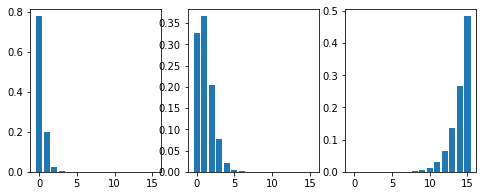

In [103]:
fig, axes = plt.subplots(1, N_samps, figsize=(8, 3))

for tr in range(N_samps):
    axes[tr].bar(np.arange(K+1), P[tr, :])

plt.show()